In [ ]:
import pandas as pd

Part I: Popularity based recommendation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ratings_Beauty.csv')
df3 = df.copy()
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [ ]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df.shape

(2023070, 4)

In [ ]:
pp = pd.DataFrame()
pp['occurences'] = df.groupby('ProductId')['Rating'].count()
mp = pp.sort_values('occurences', ascending=False)
mp.head(10)

,occurences
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


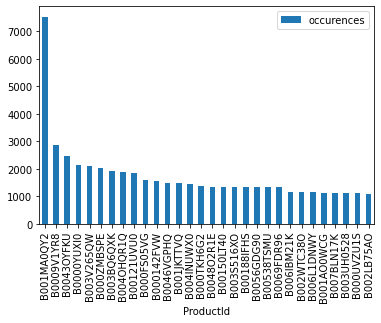

In [ ]:
mp.head(30).plot(kind = "bar")

Part II: Content based recommendation

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/flipkart_com-ecommerce_sample.csv")
df2

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [ ]:
df2 = df2[['product_name', 'description']]
df2.head(10)

,product_name,description
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
7,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora..."
9,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...


In [ ]:
df2.isnull().sum()

product_name    0
description     2
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
documents = df2['description']
documents

0        Key Features of Alisha Solid Women's Cycling S...
1        FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2        Key Features of AW Bellies Sandals Wedges Heel...
3        Key Features of Alisha Solid Women's Cycling S...
4        Specifications of Sicons All Purpose Arnica Do...
                               ...                        
19995    Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996    Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997    Buy Elite Collection Medium Acrylic Sticker fo...
19998    Buy Elite Collection Medium Acrylic Sticker fo...
19999    Buy Elite Collection Medium Acrylic Sticker fo...
Name: description, Length: 19998, dtype: object

In [ ]:
tf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tf.fit_transform(documents)

In [ ]:
tfidf_matrix.shape

(19998, 26197)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.03160144, 0.05869033, ..., 0.        , 0.        ,
        0.        ],
       [0.03160144, 1.        , 0.12013544, ..., 0.00288312, 0.00284999,
        0.00288312],
       [0.05869033, 0.12013544, 1.        , ..., 0.00347403, 0.00343412,
        0.00347403],
       ...,
       [0.        , 0.00288312, 0.00347403, ..., 1.        , 0.96017788,
        1.        ],
       [0.        , 0.00284999, 0.00343412, ..., 0.96017788, 1.        ,
        0.96017788],
       [0.        , 0.00288312, 0.00347403, ..., 1.        , 0.96017788,
        1.        ]])

In [ ]:
sim_df = pd.DataFrame(cosine_sim)

In [ ]:
sim_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997
0,1.000000,0.031601,0.058690,0.932310,0.019217,0.007512,0.949079,0.031788,0.041872,0.923798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.031601,1.000000,0.120135,0.037660,0.016819,0.058181,0.031848,0.979187,0.062594,0.042563,...,0.002883,0.002974,0.002813,0.002883,0.002609,0.002916,0.002609,0.002883,0.002850,0.002883
2,0.058690,0.120135,1.000000,0.060105,0.021703,0.018307,0.064550,0.120843,0.296096,0.059557,...,0.003474,0.003583,0.003390,0.003474,0.003144,0.003513,0.003144,0.003474,0.003434,0.003474
3,0.932310,0.037660,0.060105,1.000000,0.019680,0.007693,0.945738,0.032554,0.042882,0.954981,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.019217,0.016819,0.021703,0.019680,1.000000,0.004247,0.019367,0.016918,0.003596,0.019501,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.007512,0.058181,0.018307,0.007693,0.004247,1.000000,0.007570,0.058524,0.046357,0.007623,...,0.000414,0.000427,0.231761,0.000414,0.000375,0.000419,0.000375,0.000414,0.000409,0.000414
6,0.949079,0.031848,0.064550,0.945738,0.019367,0.007570,1.000000,0.032035,0.042198,0.942002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.031788,0.979187,0.120843,0.032554,0.016918,0.058524,0.032035,1.000000,0.062963,0.032257,...,0.002900,0.002991,0.002830,0.002900,0.002625,0.002933,0.002625,0.002900,0.002867,0.002900
8,0.041872,0.062594,0.296096,0.042882,0.003596,0.046357,0.042198,0.062963,1.000000,0.042490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.923798,0.042563,0.059557,0.954981,0.019501,0.007623,0.942002,0.032257,0.042490,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
indices = pd.Series(df2.index, index = df2['product_name']).drop_duplicates()

In [ ]:
indices

product_name
Alisha Solid Women's Cycling Shorts            0
FabHomeDecor Fabric Double Sofa Bed            1
AW Bellies                                     2
Alisha Solid Women's Cycling Shorts            3
Sicons All Purpose Arnica Dog Shampoo          4
                                           ...  
WallDesign Small Vinyl Sticker             19995
Wallmantra Large Vinyl Stickers Sticker    19996
Elite Collection Medium Acrylic Sticker    19997
Elite Collection Medium Acrylic Sticker    19998
Elite Collection Medium Acrylic Sticker    19999
Length: 19998, dtype: int64

In [ ]:
def recommend_similar_products(product_name, cosine_sim = cosine_sim):

  idx = indices[product_name]

  linear_scores = list(enumerate(cosine_sim[idx]))

  linear_scores = sorted(linear_scores, key = lambda x: x[1], reverse = True)

  linear_scores = linear_scores[0:11]

  product_indices = [x[0] for x in linear_scores]
  scores = [x[1] for x in linear_scores]

  newdf = {'Product name':list(df2['product_name'].iloc[product_indices]),'Similarity score':list(scores)}

  return pd.DataFrame(newdf)

In [ ]:
product_list = pd.Series(df2['product_name'], index = df2.index).drop_duplicates()

In [ ]:
product_list.head(50)

0                   Alisha Solid Women's Cycling Shorts
1                   FabHomeDecor Fabric Double Sofa Bed
2                                            AW Bellies
4                 Sicons All Purpose Arnica Dog Shampoo
5     Eternal Gandhi Super Series Crystal Paper Weig...
8     dilli bazaaar Bellies, Corporate Casuals, Casuals
10                                       Ladela Bellies
11                               Carrel Printed Women's
12              Sicons All Purpose Tea Tree Dog Shampoo
14               Freelance Vacuum Bottles 350 ml Bottle
17                                   Style Foot Bellies
20           Sicons Conditioning Conditoner Dog Shampoo
22              dongli Printed Boy's Round Neck T-Shirt
23                                   SWAGGA Women Clogs
24    Kennel Rubber Dumbell With Bell - Small Rubber...
25                            Glus Wedding Lingerie Set
26    Veelys Shiny White Quad Roller Skates - Size 4...
27             Bulaky vanity case Jewellery Vani

In [ ]:
import random
random_number = random.randint(0, 100)
print(random_number)
random_product_name = product_list[random_number]

print(random_product_name)

24
Kennel Rubber Dumbell With Bell - Small Rubber Rubber Toy For Dog


In [ ]:
#random_product_name = "Sicons All Purpose Arnica Dog Shampoo"
print("Below are the recommendations for the product -",  random_product_name, "\n")
print(recommend_similar_products(random_product_name))


Below are the recommendations for the product - Kennel Rubber Dumbell With Bell - Small Rubber Rubber Toy For Dog 

                                         Product name  Similarity score
0   Kennel Rubber Dumbell With Bell - Small Rubber...          1.000000
1                   Pawzone Rubber Rubber Toy For Dog          0.656046
2   Creative Spinach Blue Lion Fish Aquarium Toy S...          0.277633
3                      Snug Hug Jute Chew Toy For Dog          0.223339
4                          Ceela Rubber Chevron  Grip          0.215636
5     3a Autocare Rubber Mat Car Mat Suzuki New Swift          0.206008
6                          Rockmantra Dog Ceramic Mug          0.203827
7                                    zasmina Slippers          0.190689
8            Dhiyaa Traders Superman Rubber Key Chain          0.184123
9                             Blue Bell Popfun Sipper          0.181264
10                               Do Bhai Women Wedges          0.178761


Part III: Item to item based collaborative filtering

In [ ]:
df3

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [ ]:
df3 = df3.head(100000)

In [ ]:
df3.shape

(100000, 4)

In [ ]:
utility_matrix = df3.pivot_table(values='Rating', index='UserId', columns='ProductId')

In [ ]:
utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B0002VJIH8,B0002VJTGS,B0002VNKPO,B0002VNKPY,B0002VNKQS,B0002VNKRM,B0002VNKSG,B0002VNLG2,B0002VNZS6,B0002VQ0WO
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00473363TJ8YSZ3YAGG9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00700212KB3K0MVESPIY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0081289HG0BXFQJQUWW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01247753D6GFZD87MUV8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZTJQ7CQZUD8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZVCBG5G4EV8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZWJ3LICUEKJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
utility_matrix = utility_matrix.dropna(thresh=10, axis=1).fillna(0)

In [ ]:
utility_matrix.head(10)

ProductId,1304351475,1403790965,3227001381,535795531X,5357955948,602260074X,7535842801,7806397051,7899123011,8096399322,...,B0002UFC56,B0002UW6ZA,B0002V84VY,B0002VALQK,B0002VE4PO,B0002VHBTU,B0002VJIH8,B0002VNKPY,B0002VNKRM,B0002VQ0WO
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00700212KB3K0MVESPIY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0081289HG0BXFQJQUWW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01247753D6GFZD87MUV8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01379141PEJ6FIH7UH38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0143622X8ZC66HZXLUP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01437583CZ7V02UKZQ5S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01456542S5QPYUEGJXR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_item_similarity = utility_matrix.corr(method='pearson')
df_item_similarity.head(10)

ProductId,1304351475,1403790965,3227001381,535795531X,5357955948,602260074X,7535842801,7806397051,7899123011,8096399322,...,B0002UFC56,B0002UW6ZA,B0002V84VY,B0002VALQK,B0002VE4PO,B0002VHBTU,B0002VJIH8,B0002VNKPY,B0002VNKRM,B0002VQ0WO
ProductId,,,,,,,,,,,,,,,,,,,,,
1304351475,1.000000,-0.000129,-0.000192,-0.000135,-0.000124,-0.000147,-0.000157,-0.000210,-0.000118,-0.000143,...,-0.000166,-0.000128,-0.000295,-0.000155,-0.000151,-0.000215,-0.000406,-0.000153,-0.000154,-0.000557
1403790965,-0.000129,1.000000,-0.000177,-0.000124,-0.000114,-0.000136,-0.000145,-0.000194,-0.000109,-0.000132,...,-0.000153,-0.000118,-0.000272,-0.000143,-0.000140,-0.000198,-0.000375,-0.000141,-0.000142,-0.000514
3227001381,-0.000192,-0.000177,1.000000,-0.000184,-0.000169,-0.000202,-0.000214,-0.000287,-0.000162,-0.000196,...,-0.000227,-0.000175,-0.000404,-0.000212,-0.000207,-0.000294,-0.000556,-0.000209,-0.000211,-0.000762
535795531X,-0.000135,-0.000124,-0.000184,1.000000,-0.000119,-0.000142,-0.000150,-0.000202,-0.000113,-0.000138,...,-0.000159,-0.000123,-0.000283,-0.000149,-0.000145,-0.000206,-0.000390,-0.000147,-0.000148,-0.000535
5357955948,-0.000124,-0.000114,-0.000169,-0.000119,1.000000,-0.000130,-0.000138,-0.000185,-0.000104,-0.000126,...,-0.000146,-0.000113,-0.000260,-0.000136,-0.000133,-0.000189,-0.000358,-0.000135,-0.000136,-0.000491
602260074X,-0.000147,-0.000136,-0.000202,-0.000142,-0.000130,1.000000,-0.000165,-0.000221,-0.000124,-0.000151,...,-0.000175,-0.000134,-0.000310,-0.000163,-0.000159,-0.000226,-0.000427,-0.000161,-0.000162,-0.000586
7535842801,-0.000157,-0.000145,-0.000214,-0.000150,-0.000138,-0.000165,1.000000,-0.000235,-0.000132,-0.000160,...,-0.000186,-0.000143,-0.000329,-0.000173,-0.000169,-0.000240,-0.000454,-0.000171,-0.000172,-0.000622
7806397051,-0.000210,-0.000194,-0.000287,-0.000202,-0.000185,-0.000221,-0.000235,1.000000,-0.000177,-0.000215,...,-0.000249,-0.000191,-0.000442,-0.000232,-0.000227,-0.000322,-0.000608,-0.000229,-0.000231,-0.000834
7899123011,-0.000118,-0.000109,-0.000162,-0.000113,-0.000104,-0.000124,-0.000132,-0.000177,1.000000,-0.000121,...,-0.000140,-0.000108,-0.000248,-0.000130,-0.000128,-0.000181,-0.000342,-0.000129,-0.000130,-0.000469


In [ ]:
def standardize(row):
  new_row = (row - row.mean())/(row.max()-row.min())
  return new_row
  

In [ ]:
def get_similar_products(product_id, user_rating):
  similar_score = df_item_similarity[product_id]*(user_rating-2.5)
  similar_score = similar_score.sort_values(ascending = False)
  return similar_score

In [ ]:
print(get_similar_products('B00012FJJY', 5))

ProductId
B00012FJJY    2.500000
B000066SYB    0.128585
3227001381    0.091887
B0000DD8VH   -0.000274
B0000589YB   -0.000285
                ...   
B00006IV2F   -0.002831
B00016XJ4M   -0.003127
B00021DVCQ   -0.003320
B0002JKPA4   -0.003386
B000142FVW   -0.004248
Name: B00012FJJY, Length: 1503, dtype: float64


In [ ]:
user_history = [('1403790965', 4), ('B0002VHBTU', 5), ('535795531X', 1)]

In [ ]:
similar_products = pd.DataFrame()
for product, rating in user_history:
  similar_products = similar_products.append(get_similar_products(product, rating), ignore_index = True)
  

In [ ]:
similar_products.head()

,1403790965,B0000DD8VH,B0000589YB,B0002DO4EI,B00021BPNI,B0000532A3,B0000536AR,B00005NWSP,B0000YUVA0,979079052X,...,B0000CC64W,B000142C1A,B0000632EN,B0001ZYLAO,B00006IV2F,B00016XJ4M,B00021DVCQ,B0002JKPA4,B000142FVW,B0000YUXI0
0,1.500000,-0.000135,-0.000141,-0.000144,-0.000146,-0.000146,-0.000152,-0.000153,-0.000154,-0.000154,...,-0.001276,-0.001280,-0.001343,-0.001355,-0.001397,-0.001543,-0.001638,-0.001671,-0.002096,-0.002451
1,-0.000496,-0.000374,-0.000388,-0.000399,-0.000402,-0.000404,-0.000420,-0.000424,-0.000426,-0.000426,...,-0.003527,-0.003539,-0.003712,-0.003746,-0.003862,-0.004265,-0.004529,-0.004618,-0.005793,-0.006775
2,0.000187,0.000141,0.000146,0.000150,0.000151,0.000152,0.000158,0.000159,0.000160,0.000160,...,0.001326,0.001331,0.001396,0.001409,0.001452,0.001604,0.001703,0.001737,0.002179,0.002548


In [ ]:
print("Below are the recommendation based on the User history - ", user_history, "\n")
print("Product Id    Similarity Score")
print(similar_products.sum().sort_values(ascending = False).head(10))

Below are the recommendation based on the User history -  [('1403790965', 4), ('B0002VHBTU', 5), ('535795531X', 1)] 

Product Id    Similarity Score
B0002VHBTU    2.500012
1403790965    1.499691
B000052YKM    0.075534
B00028OSI0    0.041712
B00028MLG6    0.034715
B00014DMQE    0.031768
B0000C0XL8    0.031272
B000142P12    0.023839
B0000DD8VH   -0.000368
B0000589YB   -0.000383
dtype: float64
